<a href="https://colab.research.google.com/github/spacemaninSeoul/justpractice/blob/main/Convolutional_Neural_Network(CNN)_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 일단 CNN 사용해보기

컨볼루션 신경망(Convolutional Neural Network)은 매우 광범위한 분야에서 사용되고 있는데, 주로 이미지 데이터에서 진가를 발휘한다. 컨볼루션 신경망은 크게 컨볼루션층(Convolution layer)과 풀링층(Pooling layer)으로 구성되는데, 원리를 이해하기 전에 먼저 Fashion-MNIST 데이터셋에 적용해본다. 데이터를 준비하는 과정은 전과 동일하다.

## 1) 데이터 살펴보기

In [2]:
# 데이터 살펴보기
from tensorflow.keras.datasets import fashion_mnist

# 데이터를 다운 받는다.
(x_train, y_train), (x_test, y_test)  =fashion_mnist.load_data()

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9
# 0~59999 범위에서 무작위로 세 개의 정수를 뽑는다.
random_idx = np.random.randint(60000, size=sample_size)


4431872/4422102 [==============================] - 0s 0us/step


In [3]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [6]:
x_train[1]/255

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

In [7]:
# 0~1 범위로 만든다.
x_train = np.reshape(x_train / 255, (-1, 28, 28, 1))
x_test = np.reshape(x_test / 255, (-1, 28, 28, 1))

In [8]:
x_train.shape

(60000, 28, 28, 1)

In [9]:
from tensorflow.keras.utils import to_categorical
# 각 데이터 레이블을 범주형 형태로 변경한다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 검증 데이터셋을 만든다
from sklearn.model_selection import train_test_split
# 학습/테스트 데이터를 7/3 비율로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=777)

Conv2D층과 MaxPool2D층으로 모델을 구성. 마지막 단에서 Dense층(분류기라고 표현한다)을 통해 분류 작업이 이루어진다.

## 2) 모델 구성

In [10]:
# 모델 구성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

model = Sequential([
                    Conv2D(filters = 16, kernel_size = 3, padding ='same',
                           activation = 'relu', input_shape = (28, 28, 1)),
                    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),
                    Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'),
                    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),
                    Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'),
                    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),
                    Flatten(),
                    Dense(64, activation = 'relu'),
                    Dense(10, activation = 'softmax')
])

모델을 구성하는 코드에서 이전과 다른 점은 Sequential() 함수를 사용해 모델의 층을 구성하는 부분이다. 층을 구성하기 위해 Sequential() 함수에 리스트 형태로 케라스층을 제공할 수 있다. 하지만 앞으로는 이 방법보다 기존에 사용하던 add() 함수를 주로 사용하도록 한다. 예제 코드의 모델과 같이 컨볼루션 신경망은 주로 다음 그림처럼 모델을 구성한다.

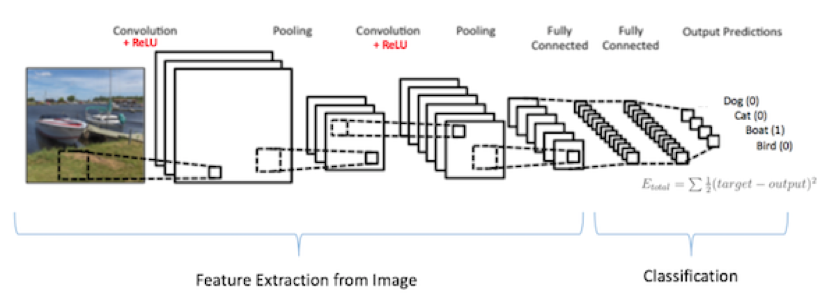

## 3) 모델 학습

In [11]:
# 모델 학습
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

model.fit(x_train, y_train,
          epochs = 30,
          batch_size = 128,
          validation_data = (x_val, y_val))

Epoch 1/30
329/329 [==============================] - 26s 75ms/step - loss: 0.6833 - acc: 0.7484 - val_loss: 0.4644 - val_acc: 0.8307
Epoch 2/30
329/329 [==============================] - 25s 75ms/step - loss: 0.3984 - acc: 0.8540 - val_loss: 0.4233 - val_acc: 0.8403
Epoch 3/30
170/329 [==============>...............] - ETA: 10s - loss: 0.3535 - acc: 0.8708

KeyboardInterrupt: ignored

이전에 살펴본 Fashion-MNIST 데이터에서 단순 Dense층으로 구성한 모델은 val_acc가 88~89%의 정확도를 얻었지만, 여기서는 컨볼루션 신경망을 활용하여 그보다 더 높은 91%의 정확도를 얻었다. 이번 예제를 통해 이미지 데이터에서 Dense층으로 구성한 모델보다 컨볼루션 신경망으로 구성한 모델이 향상된 성능을 보여준다는 것을 확인할 수 있다.

# 2. 컨볼루션층과 풀링층

컨볼루션층과 풀링층의 원리를 살펴보도록 한다.

## 1) 컨볼루션층을 사용하는 이유

컨볼루션층의 이해를 돕기 위해 먼저 완전연결층(전에 자주 사용했던 Dense층)과의 차이와 컨볼루션 필터에 대해 알아보도록 한다.

### 1) 완전연결층과의 차이

완전연결층(fully-connected layer은 1차원 배열의 형태의 데이터를 통해 학습한다는 것을 이전 예제에서 경험했다. 완전연결층의 단점은 다음과 같다.
  - 단순히 데이터를 펼쳐서 사용하기에 각 이미지 픽셀의 관계를 고려하지 않는다.
  - 2차원 배열 형태의 데이터(28, 28)를 1차원 배열 형태의 데이터(28 * 28)로 변환하면서 본래 데이터 특징을 잃어버리게 된다.

다시 말해, 완전연결층에 햄버거 이미지를 입력하면 햄버거 패티, 치즈, 양상추 등을 학습하는 것이 아닌 햄버거 전체(전역적 특징)를 학습하게 된다. 전역적 특징을 학습하는 것의 문제점은 같은 햄버거라도 패티의 위치나 내용물이 달라지는 경우 다른 햄버거로 인식하여 상당히 부정적인 결과를 얻을 수 있다는 것이다. 이를 "공간 정보를 손실한다"고 표현한다. 완전연결층은 은닉 유닛 수를 늘려 문제를 해결할 수도 있지만, 급격히 증가하는 파라미터 수로 인해 과대적합 문제가 발생할 수 있다.

하지만 **컨볼루션층은 이미지 픽셀 사이의 관계를 고려하기 때문에, 햄버거 패티, 치즈, 양상추 등의 지역적 특징을 학습하여 햄버거를 판단한다.** 지역적 특ㄱ징은 빵 밑에 패티가 있고, 다시 그 밑에 빵이 있거나 또는 사람의 얼굴에서 눈 옆에 코가 있고 그 밑에 입이 있는 것과 같은 예처럼 각 특징 사이의 관계를 의미한다. 이를 "공간 정보를 유지한다"고 표현한다. 또한, 각 필터의 파라미터가 공유되기에 완전연결층에 비해 적은 수의 파라미터를 요구한다.

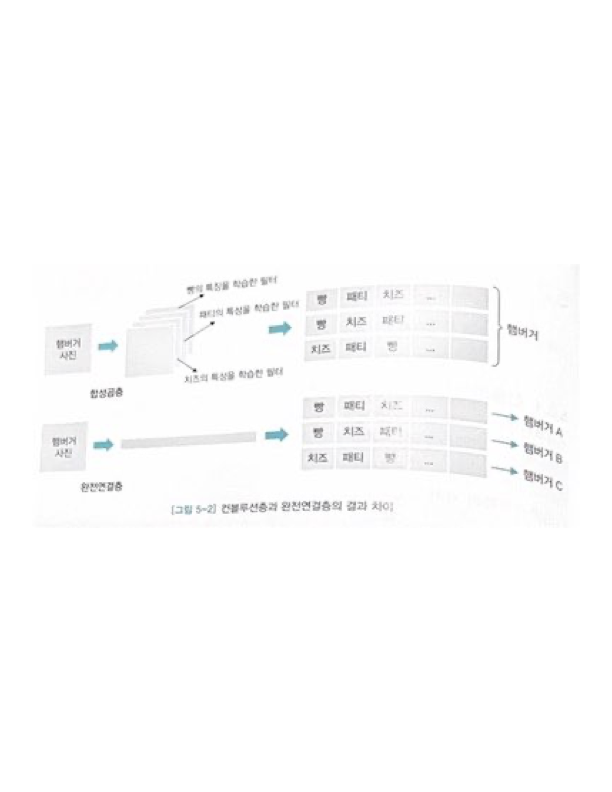

위 그림처럼 완전연결층은 전부 동일한 햄버거지만, 빵, 치즈, 패티의 위치에 따라 서로 다른 햄버거로 인식할 수 있다. 또한 컨볼루션층은 완전연결층보다 훨씬 적은 수의 파라미터를 요구한다.

### 2) 컨볼루션 필터

컨볼루션층에서는 '필터'라는 개념을 사용한다. 이는 사진을 찍고 난 후, 특정 사진 앱을 사용하여 얼굴을 변형해주는 필터와 비슷하다. 사진 앱은 얼굴을 변형하기 위해 특정 연산을 수행하는 필터를 사용했을 것이다. 이를 이미지 필터(Image Filter)라고 한다. 이미지 필터를 활용하여 변형된 얼굴 사진을 얻을 수 있다면, 컨볼루션층은 여러 개의 컨볼루션 필터를 활용하여 이미지에 내포된 다양한 정보를 인식할 수 있다.

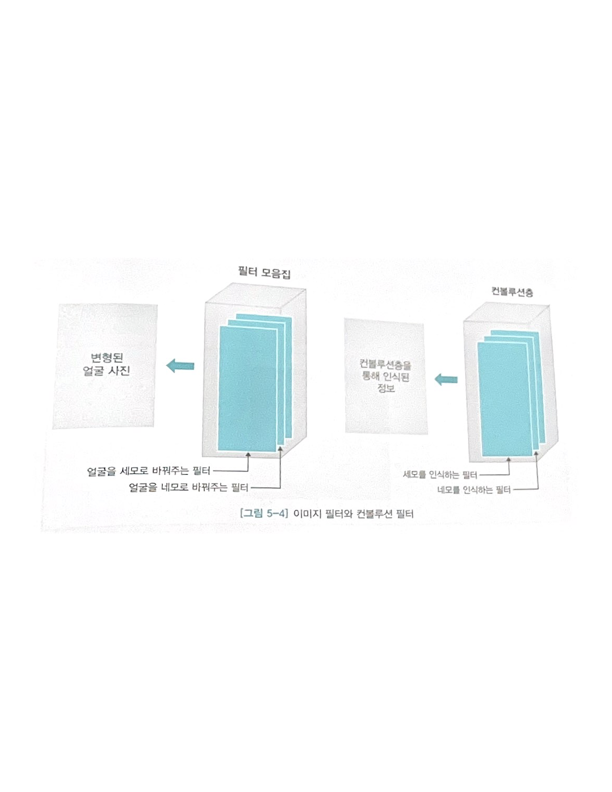

이미지 필터와 컨볼루션 필터의 공통점은 필터가 가지고 있는 파라미터를 통해 목적을 달성한다는 것인데, 이미지 필터는 파라미터를 직접 정의해주어야 하고 컨볼루션 필터는 모델의 학습을 통해 조정된다는 차이가 있다.
  - 얼굴 변형의 목적을 가진 이미지 필터는 이미지의 선명함을 목적으로 하는 필터로써 사용할 수 없다. 즉, 두 가지 목적을 동시에 달성하려면 독립적으로 각각의 필터를 직접 정의해주어야 한다.
  - 컨볼루션 필터는 모델의 학습을 통해 필터의 파라미터가 목적에 맞게끔 조정된다. 학습된 모델을 사용하면 얼굴 변형, 선명함 등의 목적을 동시에 사용할 수 있다.

이미지 필터를 이해한다면, 컨볼루션 필터를 더욱 쉽게 이해할 수 있다. 먼저 이미지 필터를 이해하기 위해 가장자리 검출(Edge-detection)에서 예씨로 자주 사용되고, 아주 유명한 소벨 필터(Sobel Filter)를 사용한다. Fashion-MNIST 데이터셋에서 특정 데이터를 하나 가져온 후 소벨 필터를 사용해 가장자리를 검출한다. 이 예제를 통해 파라미터를 직접 정의하는 것이 무슨 의미인지 알 수 있다.

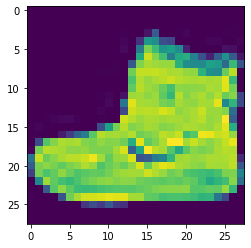

In [12]:
# 이미지 필터 사용해보기
from tensorflow.keras.datasets import fashion_mnist

# 데이터를 다운받기
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

import matplotlib.pyplot as plt
plt.imshow(x_train[0]) # 첫 번째 데이터를 그려본다.

In [13]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

첫 번째 데이터는 신발을 나타낸다. 이제 필터를 사용해 신발의 가장자리를 검출해본다. 여기서 사용할 소벨 필터는 두 가지의 대표적인 필터를 이용해 가로선(horizontal)과 세로선(vertical)을 추출한다. 그 후에 이 둘을 더하여 가장자리가 검출된 최종 이미지를 얻을 것이다. 밑에서 소벨 필터에서 사용할 두 개의 필터를 직접 정의하여 사용하도록 한다.

In [14]:
# 이미지 필터 정의하기

import numpy as np
import cv2

# 가로선을 추출하기 위한 필터
horizontal_filter = np.array([[1., 2., 1.],
                             [0., 0., 0.],
                             [-1., -2., -1.]])

# 세로선을 추출하기 위한 필터
vertical_filter = np.array([[1., 0., -1.],
                           [2., 0., -2.],
                           [1., 0., -1.]])

# 계산의 편의를 위해 이미지 형태를 (27, 27)로 줄인다.
test_image = cv2.resize(x_train[0], (27, 27))
image_size = test_image.shape[0]
output_size = int((image_size - 3) /1 + 1)
print('output의 크기 : %d' % output_size)

output의 크기 : 25


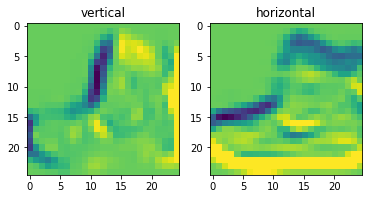

In [15]:
# 이미지 필터 적용
filter_size = 3

def get_filtered_image(filter):
  filtered_image = np.zeros((output_size, output_size))
  for i in range(output_size):
    for j in range(output_size):
      # 컨볼루션 연산
      indice_image = test_image[i:(i + filter_size), j:(j + filter_size)] * filter
      indice_sum = np.sum(indice_image)
      if(indice_sum > 255):
        indice_sum = 255
      filtered_image[i, j] = indice_sum
  return filtered_image

vertical_filtered_image = get_filtered_image(vertical_filter)
horizontal_filtered_image = get_filtered_image(horizontal_filter)

plt.subplot(1, 2, 1)
plt.title('vertical')
plt.imshow(vertical_filtered_image)

plt.subplot(1, 2, 2)
plt.title('horizontal')
plt.imshow(horizontal_filtered_image)
plt.show()

두 그림을 살펴보면, 각 필터의 목적에 맞게 세로선과 가로선을 잘 검출하고 있다.
이제 두 그림을 더해 가장자리가 검출된 최종 결과 그림을 확인한다.

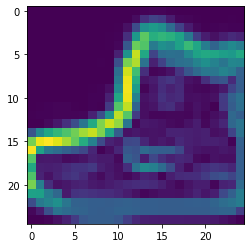

In [16]:
# 이미지 필터를 적용한 최종 결과
sobel_image = np.sqrt(np.square(horizontal_filtered_image) + np.square(vertical_filtered_image))

plt.imshow(sobel_image)

원하는 대로 신발의 가장자리가 잘 검출되었다. 하지만 **중요한 것은 이미지 필터(가로선 필터와 세로선 필터)를 직접 정의해서 사용했다는 것**이다. 만약 가로선과 세로선이 아닌 또 다른 특징을 검출하고 싶다면, 그에 맞는 필터를 찾기 위해 수많은 조합의 파라미터와 특정 연산을 탐색하는 실험을 무수히 반복해야 한다. 최악의 경우 필터를 잘못 정의할 경우 전혀 다른 결과를 얻는 문제가 발생할 수 있다.

**하지만 컨볼루션층을 사용하면 필터를 직접 정의할 필요가 없다.** 컨볼루션 신경망으로 구성한 모델은 가로선, 세로선 또는 어떤 물체의 특징(눈, 귀, 코, 입)을 학습하게 되는데, 앞서 언급했듯이 컨볼루션 필터의 파라미터가 학습을 통해 적절히 조정된다는 것이다. 그뿐만 아니라 여러 개의 필터를 사용하여 다수의 특징을 학습하고, 인식할 수 있게 된다.

## 2) 컨볼루션 알아보기

컨볼루션층이 이미지에 존재하는 물체의 특징을 인식할 수 있다는 것을 이미지 필터와 비교하여 알아보았다. 여기서는 컨볼루션층에서 사용하는 용어를 알아보도록 한다.
 - 컨볼루션 연산(Convolution)
 - 스트라이드(Stride)
 - 패딩(Padding)

### (1) 컨볼루션 연산과 스트라이드

아래 그림처럼 컨볼루션층은 주어진 입력 데이터에서 컨볼루션 필터를 활용하여 원소별 곱과 윈도우 슬라이딩(Window Sliding)을 행하는 컨볼루션 연산을 통해 특징맵(Feature Map)을 만들게 된다.

윈도우 슬라이딩은 컨볼루션 필터가 정의된 스트라이드의 크기만큼 창문을 닦듯이 미끄러지면서 입력 데이터를 훑는 것을 의미한다. 필터가 일정 방향으로 스트라이드 크기만큼 움직이면서 원소별 곱을 수행한다.

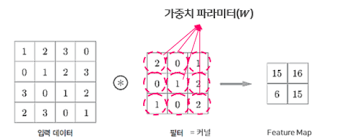

곱이 바로 컨볼루션 연산

이때 필터의 크기를 정해야 하는데, 여기서는 **일반적으로 많이 사용하는 3x3의 크기를 사용했다. 이때 컨볼루션 필터는 지정해준 스트라이드의 크기만큼 움직이게 된다.** 다음 그림은 1x1 스트라이드와 3x3 필터 크기를 사용하는 컨볼루션 연산의 예이다.

![image.png](₩)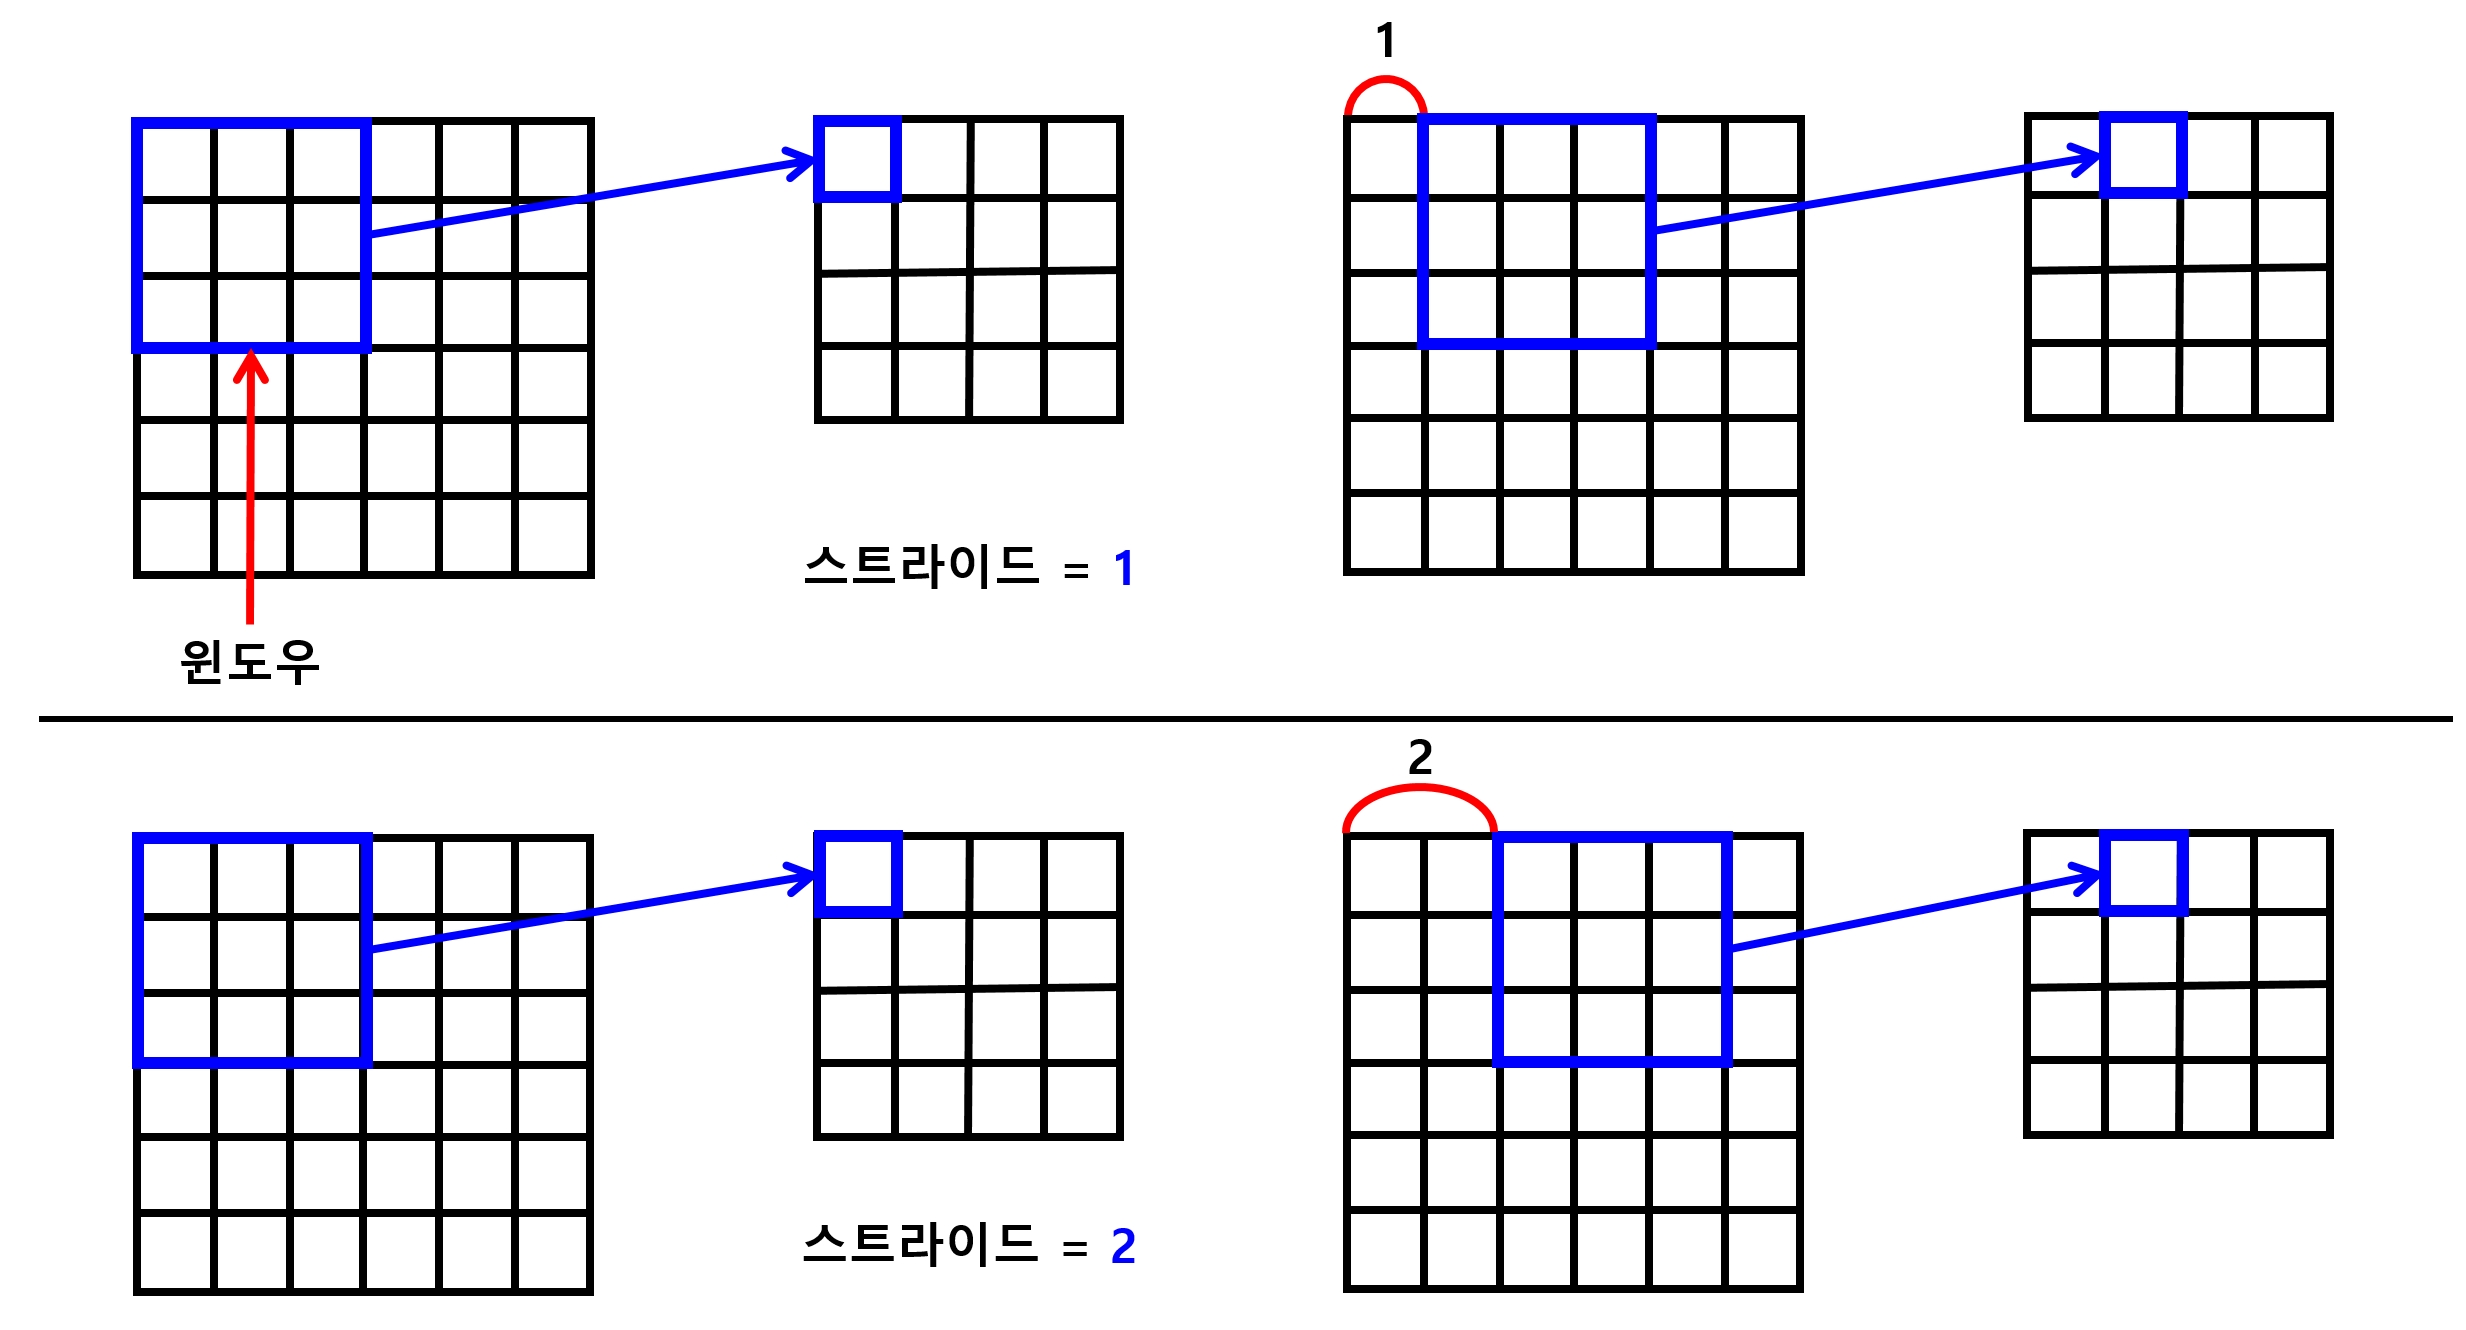

스트라이드 또한 주로 사용하는 1x1 크기를 포함하여 1x2, 2x1, 2x2, 3x3 등의 크기를 사용할 수 있다.

1x1 스트라이드보다 큰 스트라이드를 사용하는 경우 특징맵을 다운샘플링(신경망의 파라미터 수를 감소시키는 효과)하는 효과를 볼 수 있다. 하지만 스트라이드보다 풀링 개념을 통해 다운샘플링을 수행하게 될 것이다. 위의 두 가지 예시는 전부 입력 데이터보다 특징맵의 크기가 감소한 형태로 출력된다.

### (2) 패딩

특징맵의 크기가 감소하지 않고, 입력 데이터의 형태와 동일한 형태를 출력값으로 얻고 싶은 경우 패딩을 사용한다. 또한, 패딩을 사용하게 되면 이미지 가장자리 부분에 해당하는 정보를 손실하지 않고 전달해줄 수 있는 효과를 볼 수 있다. 패딩은 다음과 같이 행과 열에 특정 숫자를 추가한다.

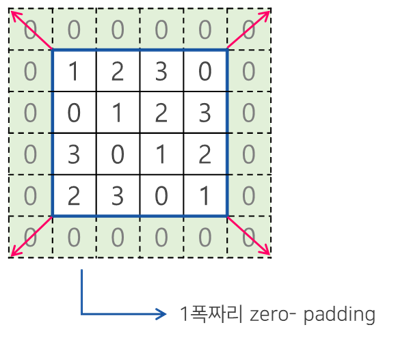

컨볼루션 신경망에서는 패딩을 이용하여 특징맵의 크기를 적절하게 조절하게 된다. **다시 한번, 패딩은 주로 특징맵의 크기를 입력 데이터와 동일하게 얻기 위해 사용한다는 점을 기억해야 한다.**

패딩을 포함하여 입력 데이터에 컨볼루션 연산을 적용할 경우, 컨볼루션층의 결괏값인 특징맵의 크기는 다음 그림과 같이 계산할 수 있다. 그림에서 볼 수 있는 수식은 컨볼루션 신경망에서 각 컨볼루션층이 출력하는 특징맵 크기를 확인해보는 경우에 사용되므로 알아두면 유용하다. 하지만 케라스에서는 모델을 구성하는 각 층의 입력과 출력의 크기를 직접 계산해주니 걱정하지 않아도 된다.

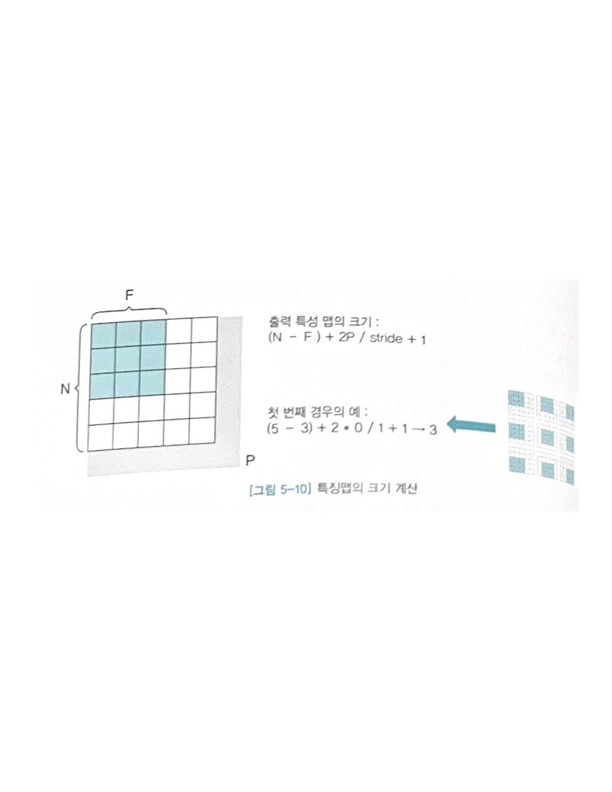

위의 그림에서 N은 입력 데이터의 크기, F는 필터의 크기, P는 패딩의 크기를 나타낸다.

마지막으로 필터를 통해 특징맵이 어떻게 만들어지는지 간단한 그림을 통해 살펴보도록 한다. 입력 데이터는 RGB 채널로 이루어진 이미지 데이터라 가정한다.

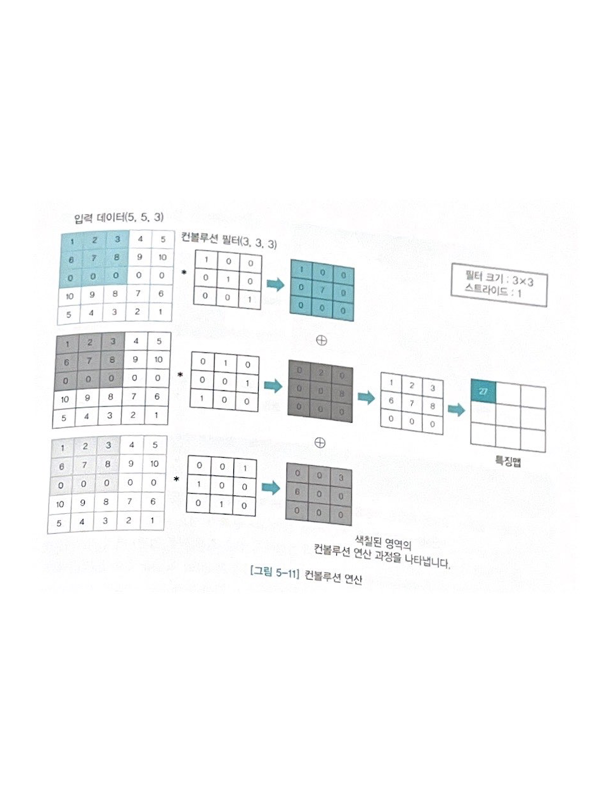

컨볼루션 연산에 쓰일 필터는 (filter_size, filter_size, input_channel)의 형태를 가진다. 따라서 위의 경우는 필터 크기가 3이고, RGB로 이루어진 입력 데이터의 채널이 3이기에 (3, 3, 3) 형태의 컨볼루션 필터가 생성된 것으로 볼 수 있다. 그 다음 원소곱(element-wise, 벡터의 내적이 아니라 단순하게 같은 위치의 원소끼리 곱하는 것)을 통해 값을 만들어 낸 뒤, 이를 전부 더한다. 다시 이 값들을 전부 더하면 비로소 특징맵에서 한 개의 셀에 해당하는 값이 만들어진다.

실제 모델에서 Conv2D층의 첫 번째 인자값이 64라면, 위의 경우에서 필터가 가지는 전체 파라미터 수는 (64 * 3 * 3* 3)이 된다.

다음으로는 다운샘플링을 위해 주로 사용하는 풀링 연산에 대해 알아본다.

## 3) 풀링 연산 알아보기

'1. 일단 CNN 사용해보기'에서 모델을 구성하기 위해 Conv2D -> Maxpool2D -> Conv2D -> ... 와 같이 반복적인 패턴을 사용했다. 풀링 연산에서는 평균값을 사용하는 평균 풀링(Average Pooling)도 있지만, 주로 최댓값을 사용하는 최대 풀링(Max Pooling)을 사용한다.

컨볼루션 신경망에서 최대 풀링은 일반적으로 2x2 스트라이드와 2x2 윈도우 크기를 사용해서 특징맵 크기를 절반으로 줄이는 역할을 한다(다운샘플링). 최대 풀링의 연산 방식은 다음 그림에서 볼 수 있다.

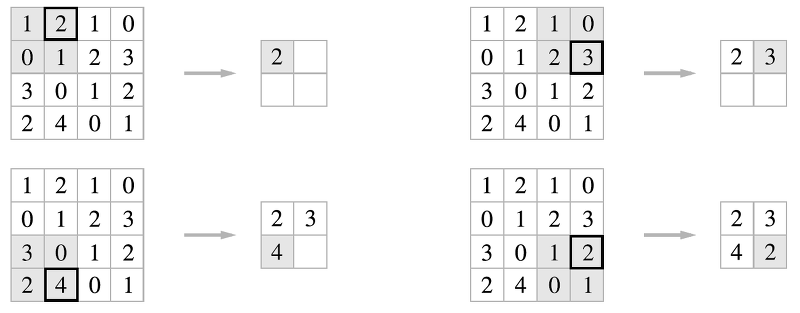

위읙 그림처럼 최대 풀링은 해당 윈도우에서 가장 큰 값을 특징값으로 사용하게 된다. 최대 풀링 연산은 당므과 같은 장점을 제공한다.
 - **모델이 물체의 주요한 특징을 학습할 수 있도록 도와주며, 컨볼루션 신경망이 이동 불변성(translation or shift invariant) 특성을 가지도록 한다.** 이동 불변성은 물체가 어느 위치에 있어도 그 물체를 인식할 수 있다는 것을 의미한다. 위의 그림에서 윗쪽 왼편 면의 가장 큰 숫자 2와 숫자 0의 자리를 바꾸어도 최대 풀링층은 여전히 2라는 특징을 잡아낼 것이다. 그 외에도 크기 불변성(Scale invariant), 회전 불변성(Rotation invariant) 등과 같은 특징이 있지만, 이에 대해서는 취약점을 가지고 있다. 이를 해결하기 위해 일반적으로 데이터 증식(Data augmentation) 방법을 활용한다.
 - 모델 파라미터 수를 줄여준다. 이는 곧 계산 속도 향상과도 연관이 있으며, 과대적합 문제에 노출될 위험을 줄여준다.

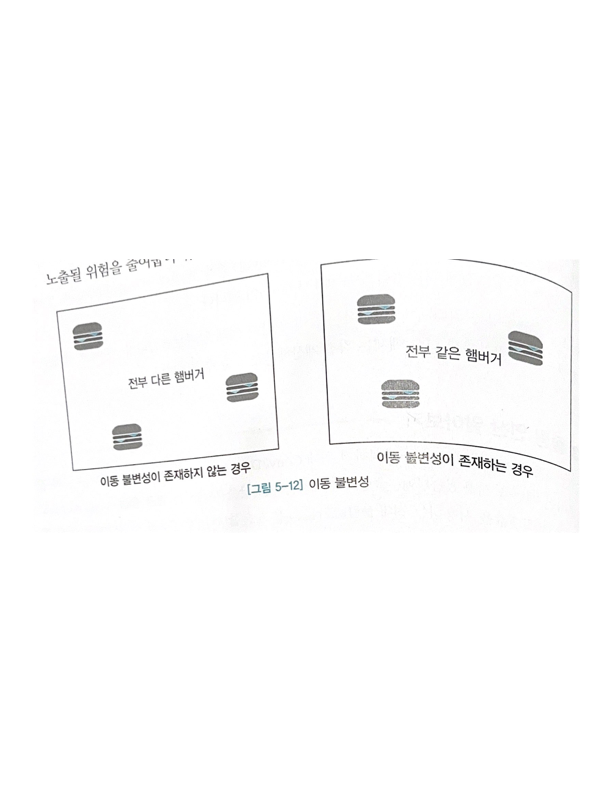

앞서 언급했듯이, 풀링 연산에는 최대 풀링뿐만 아니라 평균 풀링도 존재한다. 평균 풀링은 각 윈도우에 속하는 값들을  평균 내어 특징값으로 사용하게 된다. 하지만 실제 모델에서 평균 풀링은 자주 사용되지 않는다. 어떤 물체의 존재 여부를 알기 위해서는 가장 명확한 특징값을 사용하여 학습하는 것이 좋다고 알려져 있다. 또, 컨볼루션 신경망에서 최대 풀링층을 사용하고 있다면, 컨볼루션층에서 1x1 스트라이드 사용을 권장한다. **최대 풀링층이 강한 특징값을 뽑아냄과 동시에 특징맵의 크기를 줄여 다운샘플링을 행하기에 컨볼루션층에서는 가급적이면 정보를 보존하는 것이 좋다.**

original image shape : (28, 28)
pooled image shape : (14, 14)


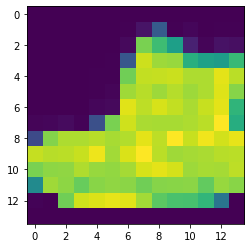

In [17]:
## 풀링 연산 구현
import numpy as np

image = x_train[0]
image_x = image.shape[0]
image_y = image.shape[1]
new_image_x = int(image_x / 2)
new_image_y = int(image_y / 2)

pooled_image = np.zeros((new_image_x, new_image_y))

print(f'original image shape : ({image_x}, {image_y})')
print(f'pooled image shape : ({new_image_x}, {new_image_y})')

for x in range(0, image_x, 2):
  for y in range(0, image_y, 2):
    pooled_image[int(x/2), int(y/2)] = np.max(image[x:x + 2, y:y + 2])

plt.imshow(pooled_image)

## 4) 모델 다시 살펴보기

Conv2D층, MaxPool2D층을 다시 살펴보도록 한다.

In [18]:
# 모델 구성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

model = Sequential([
                    # 항상 모델의 첫 번째 층은 입력의 형태를 명시해주어야 한다.
                    Conv2D(filters = 16, kernel_size = 3, padding ='same',
                           activation = 'relu', input_shape = (28, 28, 1)),
                    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),
                    Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'),
                    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),
                    Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'),
                    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),
                    Flatten(),
                    Dense(64, activation = 'relu'),
                    Dense(10, activation = 'softmax') # 열 개의 출력을 가지는 신경망
])

7행에서 주의 깊게 살펴보아야할 내용들은 다음과 같다.


```
Conv2D(filters = 16, kernel_size = 3, padding ='same',
                           activation = 'relu', input_shape = (28, 28, 1))
```
 - filters : 특징맵의 차원을 결정한다. filters = 16은 16개의 컨볼루션 필터를 사용한다는 의미이며, 특징맵의 형태는 (batch_size, rows, cols, filters)가 된다.
 - kernel_size : (3, 3)과 같이 튜플 형태로 필터의 크기를 설정한다. 위의 경우처럼 하나의 숫자 k를 전달할 경우 자동으로 (k, k) 필터 크기로 설정된다.
 - strides : 스트라이드 크기를 지정한다지정한다. 기본값은 (1, 1)으로 kernel_size와 같이 하나의 숫자 형태로 제공할 수 있다.
 - padding : 패딩에 대한 결정 여부를 지정한다. same은 패딩을 사용하여 출력 형태와 입력 형태가 동일하도록 조절하며, valid를 전달할 경우 패딩을 사용하지 않는다. 기본값은 valid.
 - activation : 사용할 활성화함수를 문자열 또는 클래스 형태로 제공한다.


9행에서 주의 깊게 살펴볼 내용은 다음고 같다.



```
MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),
```
 - pool_size : 풀링층에서 사용할 커널의 크기를 설정한다. Conv2D의 kernel_size처럼 하나의 숫자 형태로 제공할 수 있다.
 - strides : 스트라이드 크기를 지정한다. 기본값은 None이다. 이 값이 주어지지 않는 경우 pool_size의 크기와 동일한 크기로 지정된다. 예를 들어, pool_size = (2, 2)이고 스트라이드가 None이라면, 실제 최대 풀링층의 스트라이드는 (2, 2)로 적용된다.
 - padding : Conv2D층의 내용과 동일하다.



여기서는 Conv2D층과 MaxPool2D층에서 사용하는 대표적인 인자만 설명했다. 여기서 구성한 모델은 두 가지 층을 반복적으로 거쳐 특징을 추출하고, Flatten층고가 Dense층을 통과하여 최종 결괏값을 만들게 된다.

스트라이드, 필터 크기, 풀링층의 사용 개수 등은 입력 데이터의 형태를 변형시키는 주요 요소이다. 이러한 모델의 구조를 편리하게 확인하기 위해 summary()와 plot_model() 함수를 활용하는 것이다 summary() 함수는 매우 간단하다. 모델을 구성하고 함수를 사용하기만 하면 된다.

In [19]:
# model.summary() 함수 사용하기
model.summary() # 모델의 구조를 확인한다 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 64)        

결과를 보면 summary() 함수는 각 층의 이름(Layer)과 출력 형태(Output Shape), 각 층에서 사용하는 파라미터 수(Param #)에 대한 정보를 제공한다. 다음은 plot_model() 함수이다.

plot_model() 함수를 사용하기 위해서는 pydot과 graphviz 패키지를 설치해야 한다.

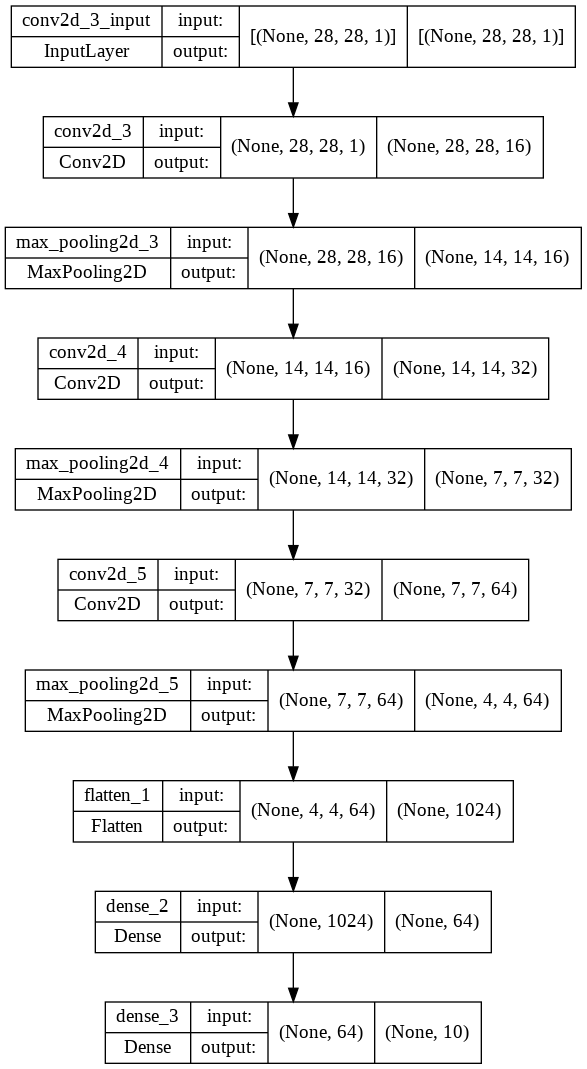

In [21]:
# plot_model() 함수 사용하기
from tensorflow.keras.utils import plot_model
plot_model(model, './model.png', show_shapes=True)